# DETECTOR DE IDIOMAS PARA TWITTER

### PORTUGUÊS, INGLÊS, ESPANHOL, ALEMÃO, ITALIANO, FRANCÊS, RUSSO, ÁRABE

In [1]:
from sklearn.model_selection import train_test_split
from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from venn import venn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import re
import datetime

In [137]:
df_PT = pd.read_csv('./BASES IDIOMAS/Português/@Estadao_tweets.csv')
df_ES = pd.read_csv('./BASES IDIOMAS/Espanhol/@CNNE_tweets.csv')
df_IN = pd.read_csv('./BASES IDIOMAS/Inglês/@CNN_tweets.csv')
df_FR = pd.read_csv('./BASES IDIOMAS/Francês/@lemondefr_tweets.csv')
df_IT = pd.read_csv('./BASES IDIOMAS/Italiano/@corriere_tweets.csv')
df_AL = pd.read_csv('./BASES IDIOMAS/Alemão/@derspiegel_tweets.csv')
df_RU = pd.read_csv('./BASES IDIOMAS/Russo/@kpru_tweets.csv')
df_AR = pd.read_csv('./BASES IDIOMAS/Árabe/@AJArabic_tweets.csv')
df_HI = pd.read_csv('./BASES IDIOMAS/Hindi/@aajtak_tweets.csv')

In [138]:
df_HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49996 entries, 0 to 49995
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  49996 non-null  object
 1   fullname  49996 non-null  object
 2   time      49996 non-null  object
 3   date      49996 non-null  object
 4   text      49996 non-null  object
 5   link      49996 non-null  object
 6   mentions  49996 non-null  object
 7   hashtags  49996 non-null  object
 8   photos    49996 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [139]:
languages_dict = {'PT': df_PT,
                    'ES':df_ES,
                    'IN':df_IN,
                    'FR':df_FR,
                    'IT':df_IT,
                    'AL':df_AL,
                    'RU':df_RU,
                    'AR': df_AR,
                    'HI': df_HI}

In [140]:
languages_dict.keys()

dict_keys(['PT', 'ES', 'IN', 'FR', 'IT', 'AL', 'RU', 'AR', 'HI'])

In [141]:
for key in languages_dict:
    print(f'DATA FRAME {key}: {languages_dict[key].shape}')

DATA FRAME PT: (48870, 9)
DATA FRAME ES: (39999, 34)
DATA FRAME IN: (81725, 34)
DATA FRAME FR: (49942, 9)
DATA FRAME IT: (49988, 9)
DATA FRAME AL: (49932, 9)
DATA FRAME RU: (49998, 9)
DATA FRAME AR: (49994, 9)
DATA FRAME HI: (49996, 9)


In [142]:
for key in languages_dict:
    languages_dict[key] = languages_dict[key][:39999]
  

for key in languages_dict:
    print(f'DATA FRAME {key}: {languages_dict[key].shape}')

DATA FRAME PT: (39999, 9)
DATA FRAME ES: (39999, 34)
DATA FRAME IN: (39999, 34)
DATA FRAME FR: (39999, 9)
DATA FRAME IT: (39999, 9)
DATA FRAME AL: (39999, 9)
DATA FRAME RU: (39999, 9)
DATA FRAME AR: (39999, 9)
DATA FRAME HI: (39999, 9)


In [143]:
for key in languages_dict:
    languages_dict[key] = languages_dict[key][['text']]

In [144]:
languages_dict['HI']

,text
0,"#CSKvMI | मुंबई इंडियंस के गेंदबाजों का कहर, च..."
1,टीकाकरण दर की दृष्टि से दुनिया के विकासशील देश...
2,टक्कर मारकर मौके से फरार हुई प्रशासन की गाड़ी#...
3,बिहार में बढ़ रहे कोरोना के मामले #Coronavirus...
4,इंडिया टुडे के एंटी फेक न्यूज वॉर रूम की पड़ता...
...,...
39994,एक झटके में करोड़पति बन गया गरीब मज़दूर...#REa...
39995,वित्त मंत्री #NirmalaSitharaman ने कहा- आयात क...
39996,बच्चे ने ऐसा मॉडल बनाया कि हर कोई हैरान रह गया...
39997,भारत के लिए पड़ोस के हर देश से आ रहीं मुश्किले...


## Limpando os textos

### Tirando html, pontuação e digitos...

In [145]:
regex_html = re.compile(r'http?.*')
regex_hashtag = re.compile(r"#[^\s]+")
regex_pic = re.compile(r"pic.twitter[^\s]+")
regex_at = re.compile(r"@[^\s]+")
regex_punctuation = re.compile(r"[^\w\s]")
regex_line_break = re.compile(r"(\n)")
regex_alpha = re.compile(r"\d+")
regex_white_space = re.compile(r" +")

In [146]:
def remove(textos, regex):
    if type(textos) == str:
        return regex.sub("", textos)
    else:
        return [regex.sub("", texto) for texto in textos]

def subs_space(textos, regex):
    if type(textos) == str:
        return regex.sub(" ", textos)
    else:
        return [regex.sub(" ", texto) for texto in textos]

def lower(textos):
    if type(textos) == str:
        return textos.lower()
    else:
        return [texto.lower() for texto in textos]
    
def text_cleaner(dataframe, column):

    clean_text = []

    for item in dataframe[column]:

        clean = remove(item, regex_hashtag)   
        clean = remove(clean, regex_pic)
        clean = remove(clean, regex_at)
        clean = remove(clean, regex_html)
        clean = remove(clean, regex_punctuation)
        clean = remove(clean, regex_line_break)
        clean = remove(clean, regex_alpha)
        clean = subs_space(clean, regex_white_space)
        clean = lower(clean)

        clean_text.append(clean)

    dataframe['clean_text'] = clean_text

In [147]:
for key in languages_dict:
    text_cleaner(languages_dict[key], 'text')

In [148]:
for key in languages_dict:
    languages_dict[key]['language'] = key

In [149]:
languages_dict['HI']

,text,clean_text,language
0,"#CSKvMI | मुंबई इंडियंस के गेंदबाजों का कहर, च...",मबई इडयस क गदबज क कहर चननई क रन स पहल वकट गर ...,HI
1,टीकाकरण दर की दृष्टि से दुनिया के विकासशील देश...,टककरण दर क दषट स दनय क वकसशल दश क नचल आध हसस म...,HI
2,टक्कर मारकर मौके से फरार हुई प्रशासन की गाड़ी#...,टककर मरकर मक स फरर हई परशसन क गड,HI
3,बिहार में बढ़ रहे कोरोना के मामले #Coronavirus...,बहर म बढ रह करन क ममल,HI
4,इंडिया टुडे के एंटी फेक न्यूज वॉर रूम की पड़ता...,इडय टड क एट फक नयज वर रम क पडतल म समन आई वयरल ...,HI
...,...,...,...
39994,एक झटके में करोड़पति बन गया गरीब मज़दूर...#REa...,एक झटक म करडपत बन गय गरब मजदर,HI
39995,वित्त मंत्री #NirmalaSitharaman ने कहा- आयात क...,वतत मतर न कह आयत क लकर सचन क जररत तभ दश बनग आत...,HI
39996,बच्चे ने ऐसा मॉडल बनाया कि हर कोई हैरान रह गया...,बचच न ऐस मडल बनय क हर कई हरन रह गय,HI
39997,भारत के लिए पड़ोस के हर देश से आ रहीं मुश्किले...,भरत क लए पडस क हर दश स आ रह मशकल,HI


# Separando em treino e teste

In [150]:
language_models_dict = {}

for key in languages_dict:
    train, test = train_test_split(languages_dict[key].clean_text,
                                          test_size = 0.2,
                                          random_state = 123)
    language_models_dict.update({key:[train, test]})   

In [151]:
for key in language_models_dict:
    print(f'{key}: TRAIN SAMPLE SIZE {len(language_models_dict[key][0])} TEST SAMPLE SIZE {len(language_models_dict[key][1])}')

PT: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
ES: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
IN: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
FR: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
IT: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
AL: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
RU: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
AR: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000
HI: TRAIN SAMPLE SIZE 31999 TEST SAMPLE SIZE 8000


# Gerando o corpus de cada língua

In [152]:
def generate_corpus(text_list):
    all_text = ' '.join(text_list)
    all_words = WhitespaceTokenizer().tokenize(all_text)
    unique_words = set(all_words)
    return unique_words

In [153]:
language_corpus_dict = {}

for key in language_models_dict:
    corpus = generate_corpus(language_models_dict[key][0])
    language_corpus_dict.update({key:corpus})
    

In [154]:
for key in language_corpus_dict:
    print(f'{key} CORPUS SIZE {len(language_corpus_dict[key])}')

PT CORPUS SIZE 56447
ES CORPUS SIZE 31454
IN CORPUS SIZE 31656
FR CORPUS SIZE 45225
IT CORPUS SIZE 58621
AL CORPUS SIZE 63676
RU CORPUS SIZE 93883
AR CORPUS SIZE 70384
HI CORPUS SIZE 21137


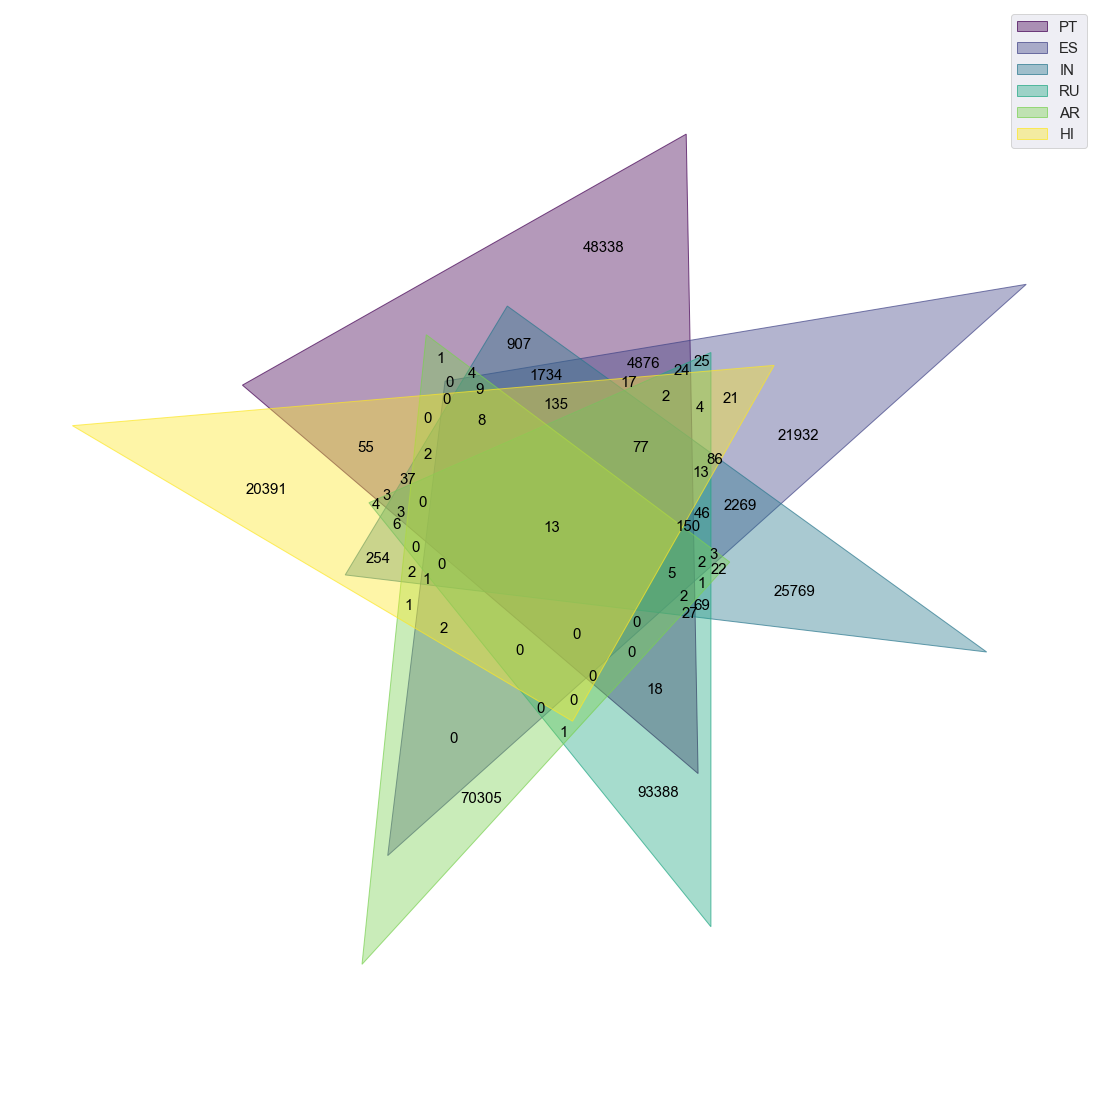

In [183]:
venn_languages_list = ['PT', 'IN', 'ES', 'RU', 'AR', 'HI'] # Escolha até seis idiomas para visualizar simultaneamente

venn_dic = {}

for key in language_corpus_dict:
    if key in venn_languages_list:
        venn_dic.update({key:language_corpus_dict[key]})
    else:
        pass
    
venn_dic

ax = venn(venn_dic, fontsize=15, figsize=(20,20))
plt.show(ax)

## Testando o detector

In [156]:
def language_detection(text_collection):
    
    detected_language = []
    
    for text in text_collection:
        if text == ' ':
            detected_language.append('Empty')
        elif text == '':
            detected_language.append('Empty')
            
        else:
            text = WhitespaceTokenizer().tokenize(text)
            text = set(text)
            
            language_score = {}
            
            for key in language_corpus_dict:
                
                score = len(text.intersection(language_corpus_dict[key]))
                language_score.update({key:score})
            language_winner = (max(language_score, key=language_score.get))
            
            if language_score[language_winner] == 0:
            
                detected_language.append('Other Languages')
                
            else:
            
                detected_language.append(language_winner)
                
    return detected_language

In [157]:
test_results = {}

for key in language_models_dict:
    
    test_detected_list = language_detection(language_models_dict[key][1])
    test_results.update({key:test_detected_list})
    
for key in test_results:
    print(f'ACCURACY {key}: {(test_results[key].count(key)/len(test_results[key]) * 100)}% out of {len(test_results[key])} texts analyzed')

ACCURACY PT: 99.8625% out of 8000 texts analyzed
ACCURACY ES: 99.58749999999999% out of 8000 texts analyzed
ACCURACY IN: 99.9375% out of 8000 texts analyzed
ACCURACY FR: 99.9375% out of 8000 texts analyzed
ACCURACY IT: 99.7% out of 8000 texts analyzed
ACCURACY AL: 99.58749999999999% out of 8000 texts analyzed
ACCURACY RU: 99.91250000000001% out of 8000 texts analyzed
ACCURACY AR: 99.4875% out of 8000 texts analyzed
ACCURACY HI: 99.97500000000001% out of 8000 texts analyzed


# Detectando idiomas nos Tweets

In [158]:
df_tweets = pd.read_csv('UNGA_tweets.csv', index_col=None, header=0, engine='python')
df_tweets = df_tweets[['date', 'text']]
df_tweets

,date,text
0,2020-09-17,3️⃣...2️⃣...1️⃣...GO‼️ 🏆 Voting is now open in...
1,2020-10-02,“Our commitment from 25 years ago still remain...
2,2020-10-02,As speakers said again and again during #UNGA ...
3,2020-10-02,From our member @carecanada CARE’s new report ...
4,2020-10-02,@WorldResources experts sum up the outcomes fr...
...,...,...
49530,2020-09-23,I’m not ready for this 🥺 This is my first time...
49531,2020-09-23,Idk why that whole who’s gonna speak thing was...
49532,2020-09-23,BTS NEXT YALL 😭😭😭😭😭😭#BTSUNSpeech #BTSxUNGA #BT...
49533,2020-09-23,Okay now i think the live crashed omfg #UNGA


## Limpando e selecionando a data de análise

In [159]:
print('Primeiro registro: ',df_tweets['date'].min())
print('Último registro: ',df_tweets['date'].max())

Primeiro registro:  2020-01-04
Último registro:  ['#UNGA']


In [160]:
date_object = []

for date in df_tweets['date']:
    
    try:
        date = datetime.datetime.strptime(date, "%Y-%m-%d")
        date_object.append(date)
    
    except:
        date_object.append(True)
        
df_tweets['date'] = date_object

print(df_tweets['date'][0])
print(type(df_tweets['date'][0]))

2020-09-17 00:00:00
<class 'datetime.datetime'>


In [161]:
date_bol = []

for item in df_tweets['date']:
    if type(item) == datetime.datetime:
        date_bol.append(True)
        
    else:
        date_bol.append(False)
        
df_tweets['date_bol'] = date_bol
df_tweets = df_tweets.query('date_bol == True')

print(type(df_tweets['date'][0]))
print(df_tweets.shape)

<class 'datetime.datetime'>
(49533, 3)


In [162]:
print('Primeiro registro: ',df_tweets['date'].min())
print('Último registro: ',df_tweets['date'].max())

Primeiro registro:  2020-01-04 00:00:00
Último registro:  2020-10-02 00:00:00


In [163]:
df_tweets = df_tweets[(df_tweets['date']>=datetime.datetime(2020,9,17)) & (df_tweets['date']<=datetime.datetime(2020,9,30))]

In [164]:
print(df_tweets.shape)
print('Primeiro registro: ',df_tweets['date'].min())
print('Último registro: ',df_tweets['date'].max())

(48096, 3)
Primeiro registro:  2020-09-17 00:00:00
Último registro:  2020-09-30 00:00:00


### Regex para remover hashtags

In [165]:
text_cleaner(df_tweets, 'text')

In [166]:
language = language_detection(df_tweets['clean_text'])
df_tweets['language'] = language

In [167]:
counter = 0

In [168]:
print(df_tweets['language'][counter])
print('****')
print(df_tweets['text'][counter])
print('***')
print(df_tweets['clean_text'][counter])
print('***')
counter += 1

IN
****
3️⃣...2️⃣...1️⃣...GO‼️ 🏆 Voting is now open in the #GoodID Awards! 🏆 Check out the nominees and cast your vote here: good-id.org/en/awards/2020/#GoodID👍🆔
***
go voting is now open in the awards check out the nominees and cast your vote here goodidorgenawards
***


### Visualizando os idiomas em termos absolutos

In [169]:
detected_language_list = list(df_tweets['language'].unique())
detected_language_list

['IN',
 'Other Languages',
 'AR',
 'ES',
 'FR',
 'RU',
 'PT',
 'AL',
 'HI',
 'Empty',
 'IT']

In [170]:
for item in detected_language_list:
    df = df_tweets.query(f"language == '{item}'")
    df.to_csv(f'./dfs_detected_languages/df_tweets_{item}.csv', index = False)

In [171]:
df_tweets['tweet'] = 1
df_language = df_tweets.groupby('language')['tweet'].count()
df_language = df_language.reset_index().sort_values('tweet', ascending =False)
df_language

,language,tweet
6,IN,31863
2,ES,6426
9,PT,2753
8,Other Languages,1971
3,Empty,1519
1,AR,1283
4,FR,913
5,HI,746
7,IT,251
0,AL,248


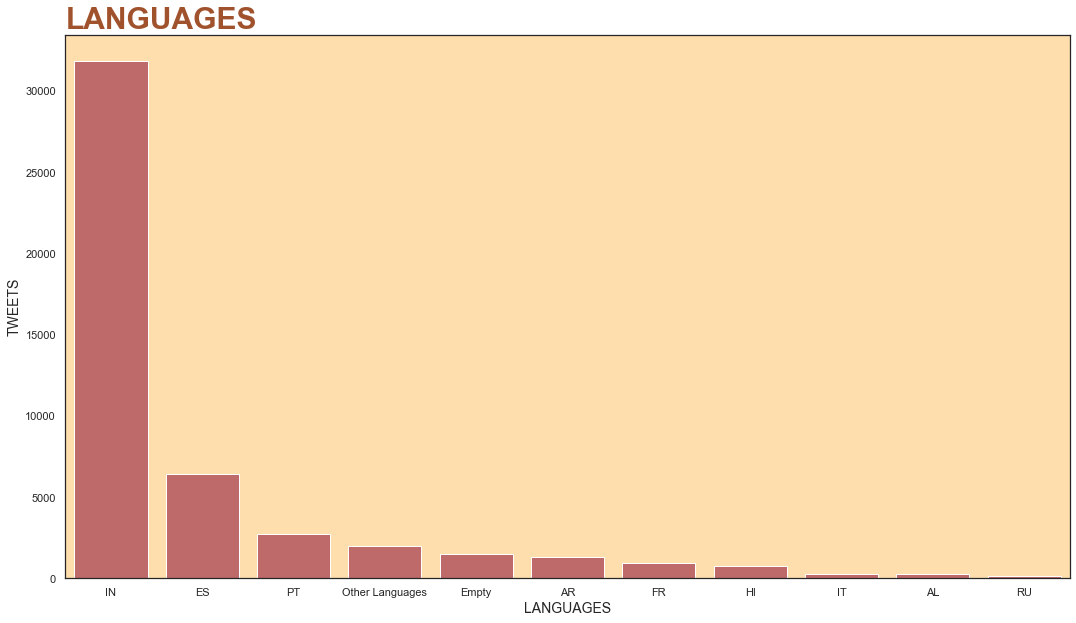

In [172]:
sns.set_style('white')
sns.set_context('notebook')
ax = sns.barplot(x='language', y='tweet', data=df_language, color ='indianred')
ax.figure.set_size_inches(18,10)
ax.set_title('LANGUAGES', fontsize=30, fontweight='bold' , color='sienna' ,loc='left')
ax.set_xlabel('LANGUAGES', fontsize=14)
ax.set_ylabel('TWEETS', fontsize=14)
ax.set_facecolor('navajowhite')
ax = ax

## Visualizando evolução das línguas no tempo

### Criando tabelas de series temporais por língua

In [173]:
languages = list(df_tweets['language'].unique())

languages_dict = {}

for item in languages:
    df_language = df_tweets.query(f"language == '{item}'")
    df_language = df_language.groupby(['date'])['text'].count()
    languages_dict.update({item:df_language})
    
df_language = pd.DataFrame(languages_dict)

In [174]:
df_language = df_language.fillna(0)

In [175]:
df_language = df_language.reset_index()

date_only = []

for item in df_language['date']:
    date = item.date()
    date_only.append(date)

df_language['date'] = date_only
df_language = df_language.set_index('date')
df_language = df_language.T

In [176]:
df_language

date,2020-09-17,2020-09-18,2020-09-20,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30
IN,440.0,9.0,6.0,15758.0,2926.0,5155.0,3805.0,776.0,819.0,1193.0,976.0
Other Languages,0.0,0.0,0.0,1154.0,125.0,264.0,248.0,66.0,41.0,35.0,38.0
AR,0.0,0.0,0.0,147.0,124.0,733.0,162.0,32.0,17.0,26.0,42.0
ES,0.0,0.0,0.0,4452.0,661.0,450.0,220.0,132.0,140.0,200.0,171.0
FR,0.0,0.0,0.0,388.0,187.0,136.0,49.0,22.0,36.0,40.0,55.0
RU,0.0,0.0,0.0,73.0,11.0,15.0,6.0,3.0,8.0,0.0,7.0
PT,0.0,0.0,0.0,2313.0,113.0,144.0,109.0,18.0,13.0,21.0,22.0
AL,0.0,0.0,0.0,103.0,19.0,38.0,18.0,16.0,26.0,8.0,20.0
HI,0.0,0.0,0.0,29.0,32.0,136.0,490.0,40.0,10.0,7.0,2.0
Empty,0.0,0.0,0.0,1035.0,75.0,150.0,123.0,63.0,32.0,19.0,22.0


In [177]:
df_language = df_language.T
df_language = df_language.reset_index()
df_language

,date,IN,Other Languages,AR,ES,FR,RU,PT,AL,HI,Empty,IT
0,2020-09-17,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-09-18,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-09-20,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-09-23,15758.0,1154.0,147.0,4452.0,388.0,73.0,2313.0,103.0,29.0,1035.0,159.0
4,2020-09-24,2926.0,125.0,124.0,661.0,187.0,11.0,113.0,19.0,32.0,75.0,17.0
5,2020-09-25,5155.0,264.0,733.0,450.0,136.0,15.0,144.0,38.0,136.0,150.0,33.0
6,2020-09-26,3805.0,248.0,162.0,220.0,49.0,6.0,109.0,18.0,490.0,123.0,20.0
7,2020-09-27,776.0,66.0,32.0,132.0,22.0,3.0,18.0,16.0,40.0,63.0,6.0
8,2020-09-28,819.0,41.0,17.0,140.0,36.0,8.0,13.0,26.0,10.0,32.0,10.0
9,2020-09-29,1193.0,35.0,26.0,200.0,40.0,0.0,21.0,8.0,7.0,19.0,4.0


In [178]:
lg = list(df_language.columns)[1:]
lg

['IN',
 'Other Languages',
 'AR',
 'ES',
 'FR',
 'RU',
 'PT',
 'AL',
 'HI',
 'Empty',
 'IT']

In [179]:
df_language = pd.melt(df_language, id_vars=['date'], value_vars=lg, var_name='languages', value_name='tweet')
df_language

,date,languages,tweet
0,2020-09-17,IN,440.0
1,2020-09-18,IN,9.0
2,2020-09-20,IN,6.0
3,2020-09-23,IN,15758.0
4,2020-09-24,IN,2926.0
...,...,...,...
116,2020-09-26,IT,20.0
117,2020-09-27,IT,6.0
118,2020-09-28,IT,10.0
119,2020-09-29,IT,4.0


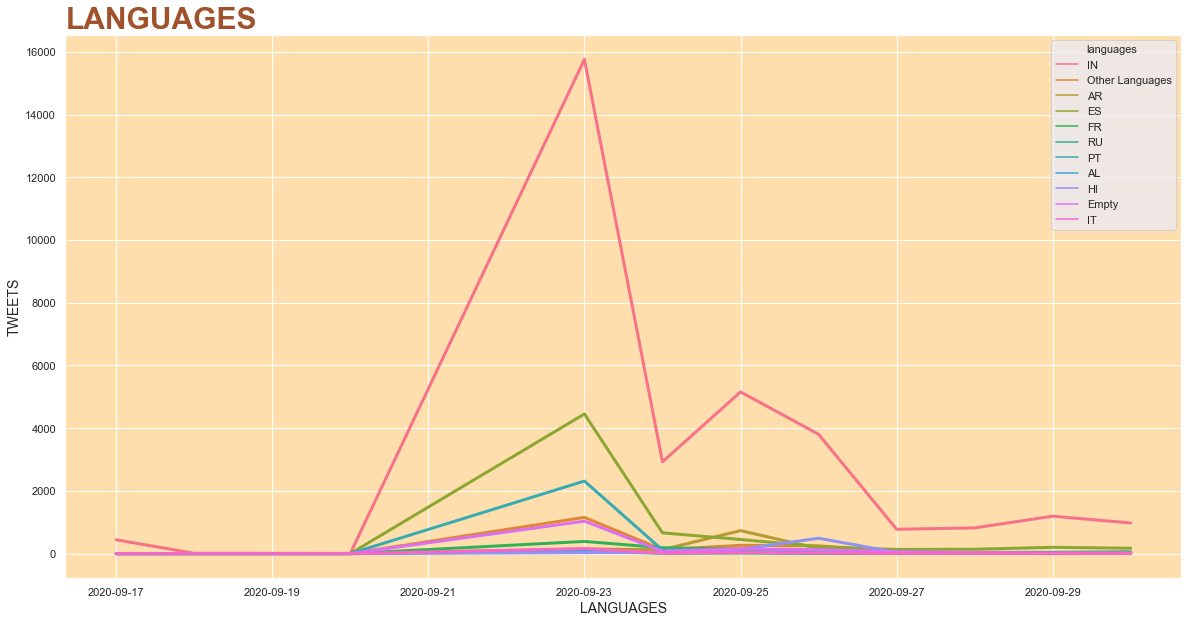

In [180]:
sns.set_style('darkgrid')
sns.set_context('notebook')
ax = sns.lineplot(x='date', y='tweet', hue = 'languages', data=df_language, color ='indianred', linewidth = 3)
ax.figure.set_size_inches(20,10)
ax.set_title('LANGUAGES', fontsize=30, fontweight='bold' , color='sienna' ,loc='left')
ax.set_xlabel('LANGUAGES', fontsize=14)
ax.set_ylabel('TWEETS', fontsize=14)
ax.set_facecolor('navajowhite')
ax = ax